In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

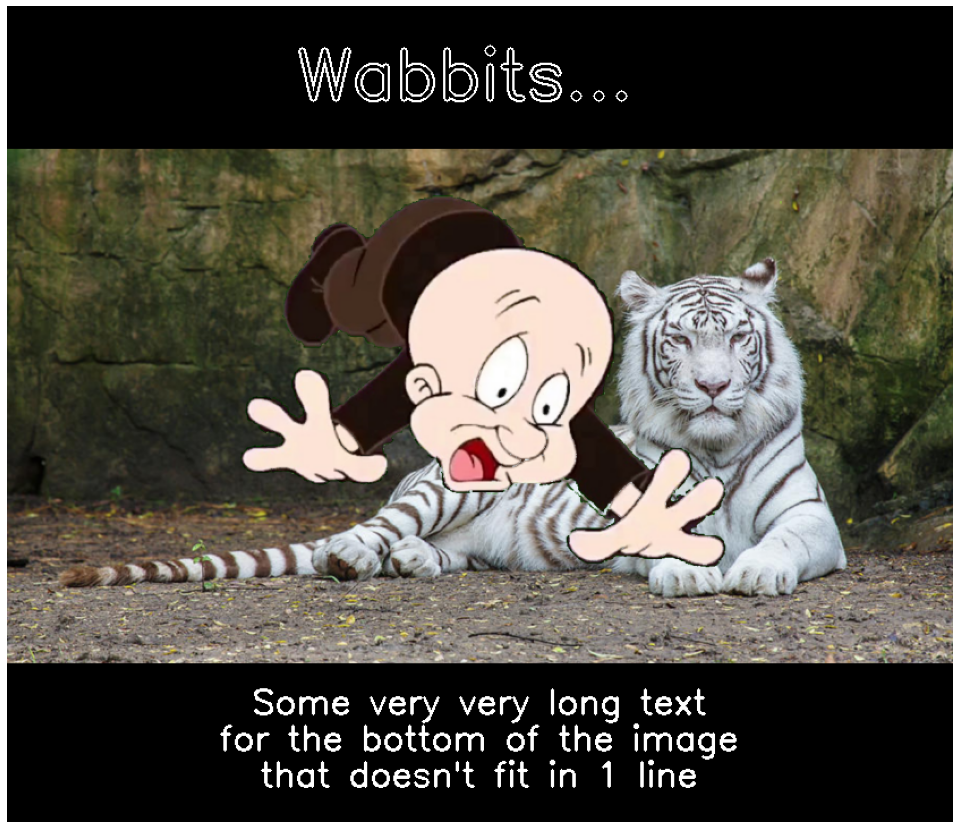

In [33]:
image = cv2.imread('images/elmer_tiger.png')
image_rgb = cv2.cvtColor(cv2.imread('images/elmer_tiger.png'), cv2.COLOR_BGR2RGB)
copy = image_rgb.copy()

# get text dimensions and get the coordinates for the centers of the x and y axis
(w,h), baseline = cv2.getTextSize('Wabbits...', cv2.FONT_HERSHEY_SIMPLEX, 2, 2)
x = int((copy.shape[1] - w) / 2)
y = int((copy.shape[0] + h) / 2)

points = np.array([[135,0],[135,125],[970,125],[970,0]], np.int32).reshape((-1,1,2))
cv2.fillPoly(copy, [points], (0,0,0))
points2 = np.array([[135,580],[135,720],[970,720],[970,580]], np.int32).reshape((-1,1,2))
cv2.fillPoly(copy, [points2], (0,0,0))

cv2.putText(copy, 'Wabbits...', (x, h+baseline*2), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 5)
cv2.putText(copy, 'Wabbits...', (x, h+baseline*2), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2)

# cropped = copy[0:720, 0:1280] # all rows all cols -> y : x
copy = copy[0:720, 135:970]

text2 = "Some very very long text\nfor the bottom of the image\nthat doesn't fit in 1 line"
for i, line in enumerate(text2.split('\n')):
    (w2,h2), baseline2 = cv2.getTextSize(line, cv2.FONT_HERSHEY_SIMPLEX, 1, 2) # font size must be the same to center the text = 1
    x2 = int((copy.shape[1] - w2) / 2) # add crop value
    y2 = int((copy.shape[0] - (h2 + baseline2) * 3)) + i * (h2 + baseline2)
    cv2.putText(copy, line, (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2) # font size must be the same to center the text = 1

plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(copy)